#Introduction tO Regression with Neural Network in Tensorlfow

There are many definitions for a regression problem but in our case ,we're going to simplify it :predicting other combination of variables ,even shorter..predicting a number

In [1]:
#Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.0


# Creating data to view and fit

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])



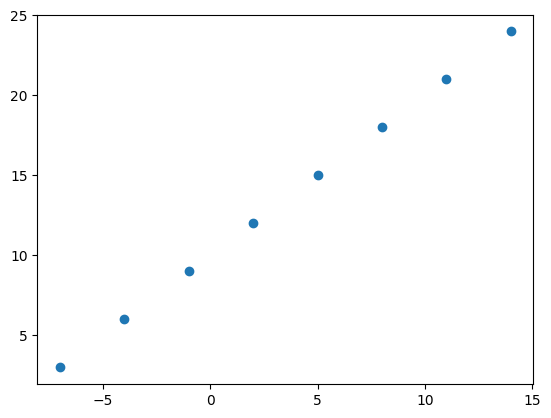

In [3]:
#Visualize it
plt.scatter(X,y);

In [4]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shape

In [5]:
#Create a demo tensor for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X[0],y[0]

(-7.0, 3.0)

In [7]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [8]:
# Turn our Numpy arrays into tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Steps in Modeling with TensorFlow:

1. **Creating a model**: Define the input and output layers, as well as the hidden layers, of a deep learning model.

2. **Compiling a model**: Define the loss function (the function which tells our model how wrong it is), the optimizer (which tells our model how to improve the patterns it's learning), and the evaluation metrics (what we use to interpret the performance of our model).

3. **Fitting a model**: Let the model try to find patterns between `X` and `y` (features and labels).


In [10]:
# Reshape X to be a 2D array
X = np.expand_dims(X, axis=-1)

In [11]:
#SET random seet
tf.random.set_seed(42)

#1.create a model using the sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),#Stochastic gradient descent
              metrics=["mae"]
              )
# 3. Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 17.3293 - mae: 17.3293
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 956ms/step - loss: 17.0481 - mae: 17.0481
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.7668 - mae: 16.7668
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 16.4856 - mae: 16.4856
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 16.2043 - mae: 16.2043


In [12]:
#Check out X and Y

X,y

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]]),
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using our model
y_pred=model.predict(np.array([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[-10.328301]], dtype=float32)

## Improving our model:

We can improve our model ,by altering the steps we took to create a model

  1.**Creating a model**-here we might add more layers ,increae the number of hidden units (all called neurons) within each of the hidden layers,change the activation function of each layer.

  2.**Compiling a model**- here we might change the optimization function or perhaps the **learning rate** of the optimization function .

  3.**Fitting a model**-here we might fit a model for more epochs (leave it training a for longer ) or on more data (give model more examples to learn from

In [14]:
# Lets Rebuild our model

# 1. Create the model
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)
# 2.Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)
# 3.Fit the model
model.fit(X,y,epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step - loss: 12.4587 - mae: 12.4587
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 12.3262 - mae: 12.3262
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 12.1937 - mae: 12.1937
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.0612 - mae: 12.0612
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.9287 - mae: 11.9287
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.7962 - mae: 11.7962
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 11.6637 - mae: 11.6637
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5312 - mae: 11.5312
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.3987 - mae: 11.3987
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 11.2662 - mae: 11.2662
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.1337 - mae: 11.1337
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.0012 - mae: 11.0012
Epoch 13/100
1/1 ━━━━━━

In [15]:
# Try and make a prediction using our model
y_pred=model.predict(np.array([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[29.707552]], dtype=float32)

In [16]:
#Lets optimize it more

# 1.create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3.Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - loss: 13.1026 - mae: 13.1026
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.5709 - mae: 12.5709
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 12.0432 - mae: 12.0432
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.5164 - mae: 11.5164
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.9825 - mae: 10.9825
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 10.4400 - mae: 10.4400
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.8870 - mae: 9.8870
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.3533 - mae: 9.3533
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7939 - mae: 8.7939
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.1976 - mae: 8.1976
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.5591 - mae: 7.5591
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.8712 - mae: 6.8712
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [17]:
# Try and make a prediction using our model
y_pred=model.predict(np.array([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[31.565025]], dtype=float32)

In [18]:
# Lets do expemriment

#Lets optimize it more

# 1.create model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation=None),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3.Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.7478 - mae: 11.7478
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 10.7982 - mae: 10.7982
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 9.8193 - mae: 9.8193
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.8052 - mae: 8.8052
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.7499 - mae: 7.7499
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.9766 - mae: 6.9766
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.3189 - mae: 7.3189
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.6814 - mae: 7.6814
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.7707 - mae: 7.7707
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.5163 - mae: 7.5163
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.1447 - mae: 7.1447
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.7947 - mae: 6.7947
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/s

In [19]:
# Try and make a prediction using our model
y_pred=model.predict(np.array([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


array([[26.10905]], dtype=float32)

### Common ways to improve  a deep learning model

* Adding layers
* Increase the number of hidden units
* Change the activation function
* Change the optimiation function
* Change the learning rate of optimization function
* Fitting on more data

## Evaluating a model
In practice a typical workflow you'll go through when building neural network is :

```
Build a model -> fit it ->evaluate it ->tweak a model ->fit it -> evaluate it -> tweak a model -> fit it->evaluate it ....

```

### when it comes to evaluation .. there are 3 words you shoudl memorize :

 > **Visualize ,Visualize ,Visualize **

 Its a good idea to visualize:
 * The data - what data are we working with ? what does it look like ?


 * The model itself -what does our model look like ?

 * The training of a model - how does a model perform while it learns ?

 * The predictions of the model -how do the prediction of a model line up agains the ground truth

In [20]:
## Make a bigger dataset

X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset

y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

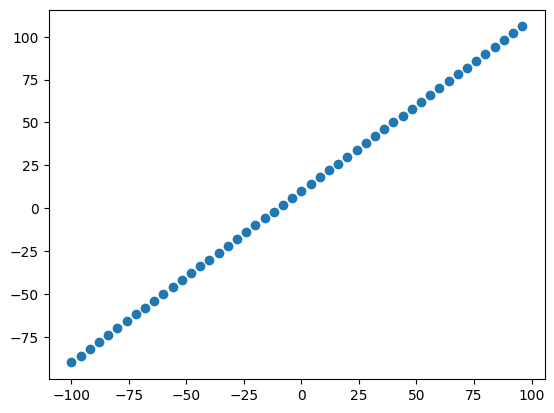

In [22]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y)

## The 3 sets ...

* Training set -The model learns from this data ,which is typically 70-80% of the total data you have available .

* Validation set - the model gets tuned on this data ,which is typically 10-15% of the data available

* Test set - the model gets evaluated on this data to test what it has learned ,this set is typically 10-15% of the total data available



In [23]:
len(X)

50

In [24]:
# Split the data into train and test data

X_train=X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

len(X_train),len(X_test),len(y_train),len(y_test)

# from sklearn.model_selection import train_test_split
# X_train,y_train,X_test,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

(40, 10, 40, 10)

### Visualizing the data


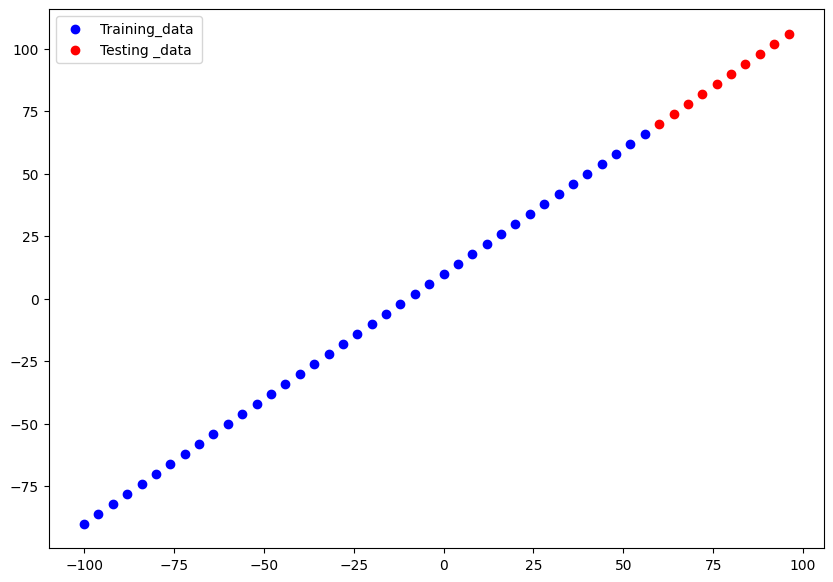

In [25]:
plt.figure(figsize=(10,7))
#plot the training data in blue
plt.scatter(X_train,y_train,c='b',label="Training_data")

#plot teh test data in red
plt.scatter(X_test,y_test,c='r',label="Testing _data ")

# Show a legend
plt.legend()

In [26]:
# Lets have a look at how to build a neural network from our data

# 1. Create  a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
    tf.keras.layers.Dense(1,name='output_layer')
])

# 2. Compile a model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# # 3.Fit a model
# model.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Visualizing the model

In [27]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params : total number of parameters in the model
* Trainable parameters : these are the parameters (patterns) the model can update as it trians
* Non-trainable parameters : these are parameters arent updated during trianing (this is typical when you introduce parameters from other model during **transfer learning**)

In [28]:
# 3.Fit a model
model.fit(X_train,y_train,epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 287ms/step - loss: 30.2683 - mae: 30.2683
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.7387 - mae: 25.7387 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.3711 - mae: 21.3711 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.0930 - mae: 17.0930 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.9447 - mae: 12.9447 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2917 - mae: 9.2917 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.8285 - mae: 7.8285 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.4133 - mae: 9.4133 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.1822 - mae: 10.1822 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.3048 - mae: 10.3048 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.9370 - mae: 9.9370 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.2047 - mae: 9.2047 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [29]:
# Get a summary or four model
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

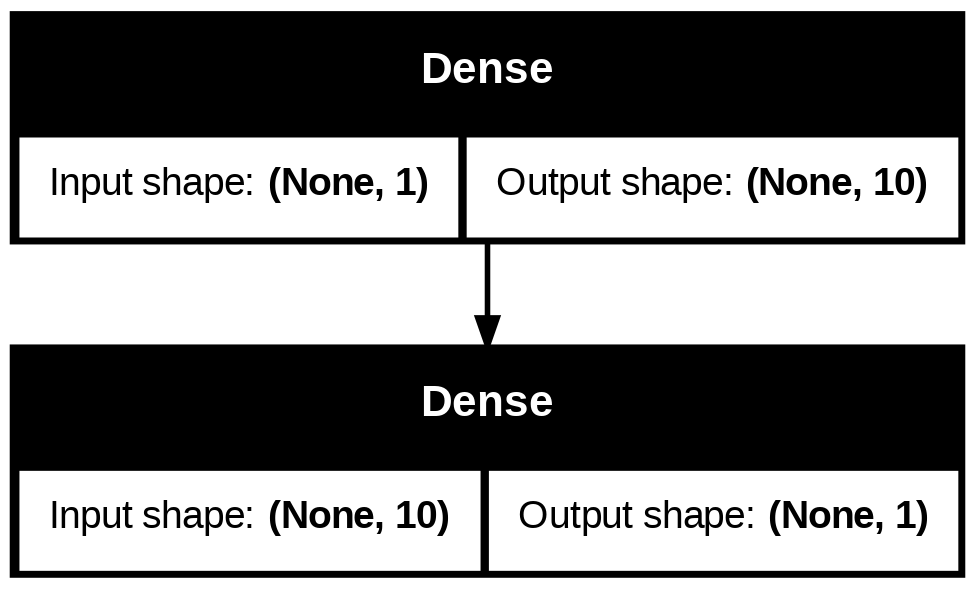

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our models predictions

* To visualize predictions ,its a good idea to plot them against the groudn truth labels.

* Often you'll see this in the form of y_test or y_true verses y_pred (ground truth verses your model )

In [31]:
# Make some prediction s
y_pred=model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


array([[ 70.49804 ],
       [ 74.53426 ],
       [ 78.570496],
       [ 82.60672 ],
       [ 86.64295 ],
       [ 90.67919 ],
       [ 94.715416],
       [ 98.75165 ],
       [102.78788 ],
       [106.824104]], dtype=float32)

In [32]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [33]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  plots training data ,test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_label,c='b',label='Training data')
  #Plot testing data in red
  plt.scatter(test_data,test_labels,c='g',label='Testing data')
  #plot the predictions in green
  plt.scatter(test_data,predictions,c='r',label='Predictions')
  #Show the legend
  plt.legend();

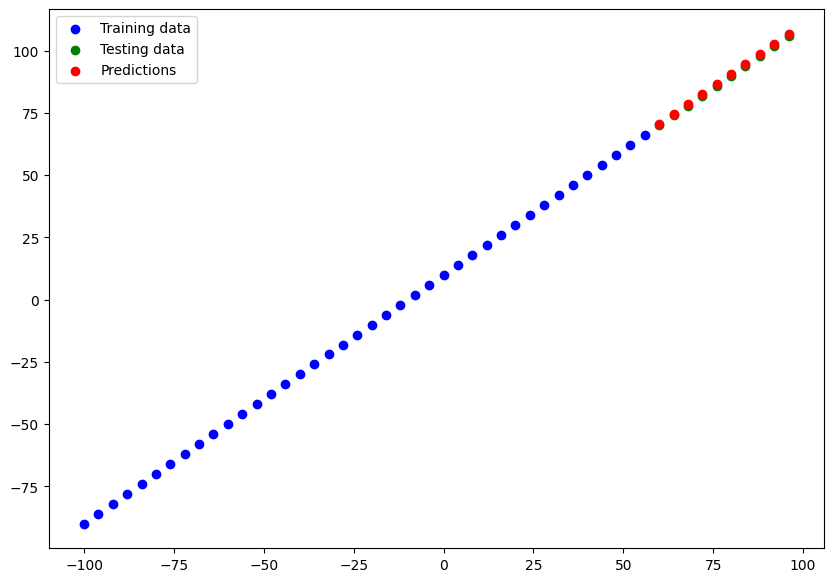

In [34]:
plot_predictions()

### Evaluating our models predictions with regression evaluation metrics:

Depending on the problem you are working on ,there will be different evaluation metrics to evaluate your models performance .

Since we're working on a regression ,two of the main metrics:
* **MAE**: mean absolute error ,"on average ,how wrong is each of my models predictions
* **MSE** :mean square error ,"square the average errors"
* **Huber**:combination of MSE,MAE (LESS sensitive to outliers than MSE)

In [35]:
# Evaluate the model on the test set
model.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.6611 - mae: 0.6611


[0.6610710024833679, 0.6610710024833679]

In [36]:
#  Calculate the mean absolute error
# mae=abs(y_test-y_pred)/len(y_test)
# mae


# mae=tf.metrics.mean_absolute_error(y_test,y_pred)
# mae


mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)  # Update the metric state with the true and predicted values
mae_result = mae.result().numpy() # Get the calculated MAE

print(mae_result)

0.661071


In [37]:


mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_test, y_pred)  # Update the metric state with the true and predicted values
mse_result = mse.result().numpy() # Get the calculated MAE

print(mse_result)

0.4478441


In [38]:
# Make some functions to reuse MAE and MSE

def mae(y_true,y_pred):
      mae = tf.keras.metrics.MeanAbsoluteError()
      mae.update_state(y_test, y_pred)  # Update the metric state with the true and predicted values
      mae_result = mae.result().numpy() # Get the calculated MAE
      return mae_result

def mse(y_true,y_pred):
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(y_test, y_pred)  # Update the metric state with the true and predicted values
    mse_result = mse.result().numpy() # Get the calculated MSE
    return mse_result




### Runnign experiments to improve our model
```
Build a model ->fit it -> evaluate it ->tweak it -> fit it ->evaluate it ->tweak it ->fit it ->evaluate it
```
1. Get more data -get more examples for your model to train on (more opportunities to learn patterns or relationship between features and labels).

2. Make your model larger (using more complex model )- this might come in the form of more layers or more hidden units in each layer.

3. Train for longer -give your model more of a chance to find patterns in the data .


Lets do 3 modelling experiments:
1. `model_1`-same as the original model ,1 layer,trained for 100 epochs
2. `model_2`-2 layers,trained for 100 epochs
3. `model_3`-2 layers,trained for 500 epochs

# Build Model_1

In [39]:
X_train.shape


TensorShape([40])

In [40]:
#reshape X_train to 2 d
X_train=tf.expand_dims(X_train,axis=-1)
X_train.shape

TensorShape([40, 1])

In [41]:
#set random seed
tf.random.set_seed(42)

# 1. create model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. compile model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - loss: 106.2870 - mae: 106.2870
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 105.4216 - mae: 105.4216  
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 104.5578 - mae: 104.5578 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 103.6942 - mae: 103.6942 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 102.8305 - mae: 102.8305 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.9668 - mae: 101.9668 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 101.1031 - mae: 101.1031 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 100.2393 - mae: 100.2393 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.3755 - mae: 99.3755   
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 98.5116 - mae: 98.5116   
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 97.6477 - mae: 97.6477 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 96.7837 - mae: 96.7837 
Epo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


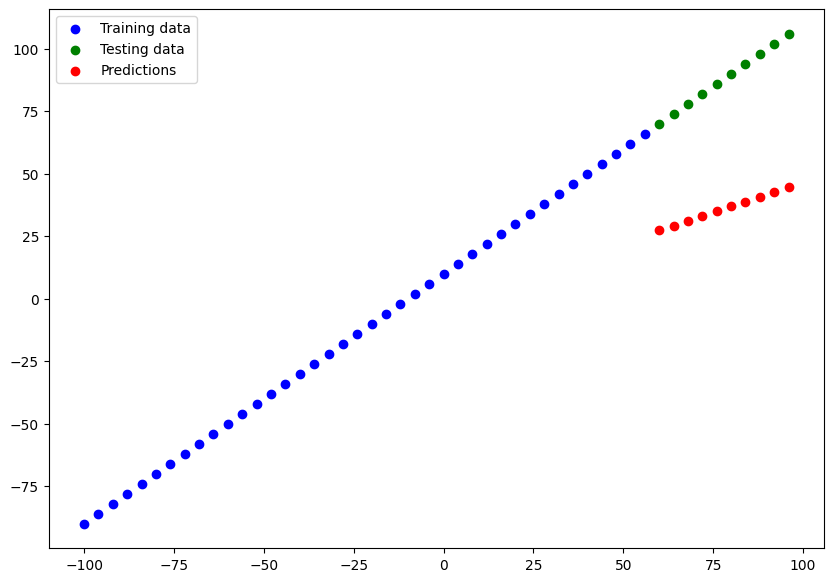

In [42]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [43]:
# Calcule model_1 evaluation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)
mae_1,mse_1

(52.024536, 2742.661)

**Build `model_2`**

* 2 dense layers ,trained for 100 epochs

In [50]:
# 1.create model

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
# 2.compile model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mse']
)
# 3.fit the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - loss: 1.4908 - mse: 3.2153
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.2516 - mse: 7.4011 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9747 - mse: 1.3422 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0200 - mse: 1.5556 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3227 - mse: 2.4982 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6255 - mse: 3.7259 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1338 - mse: 0.1099 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0012 - mse: 1.4134 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1649 - mse: 0.1855 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.5931 - mse: 3.5535 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1364 - mse: 1.8939 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6899 - mse: 0.6960 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

In [55]:
X_test=tf.expand_dims(X_test,axis=-1)
X_test.shape

TensorShape([10, 1])

In [54]:
X_test=tf.squeeze(X_test)

In [57]:
model_2_predict=model_2.predict(X_test)
plot_predictions(predictions=model_2_predict)

ValueError: Input 0 of layer "dense_16" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (10,)

**model_3**:
* 2 dense layers with 500 epochs

In [45]:
# 1.create model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
# 2.compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)
# 3.fit the model
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 226ms/step - loss: 0.5367 - mae: 0.5367
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.2853 - mae: 3.2853 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4171 - mae: 0.4171 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2525 - mae: 3.2525 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9408 - mae: 2.9408 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8514 - mae: 0.8514 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7815 - mae: 1.7815 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8806 - mae: 1.8806 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5024 - mae: 0.5024 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5077 - mae: 1.5077 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.4505 - mae: 1.4505 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2210 - mae: 0.2210 
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/st